In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

Sed_tl = pd.read_csv(path + 'transport_limited/langtang/cellnr21/Sediment.out')

Sed_mean      = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr21/Sediment.out')
Sed_percent25 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr21/Sediment.out')
Sed_percent50 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean50percent/cellnr21/Sediment.out')
Sed_percent75 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean75percent/cellnr21/Sediment.out')


In [32]:
Sed_mean

,D,Q0,Q10,Q25,Q50,Q75,Q90,Q100,sc,ls,Qstl,Qdftl
0,1951-09-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,1951-09-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2,1951-09-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
3,1951-09-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
4,1951-09-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
623107,2022-09-30 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.232000e-08,0.0,0.0,0.0
623108,2022-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.232000e-08,0.0,0.0,0.0
623109,2022-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.232000e-08,0.0,0.0,0.0
623110,2022-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.232000e-08,0.0,0.0,0.0


In [33]:

# def monthly_sum_mean(df):
#     df['D'] = pd.to_datetime(df['D'])
#     df['Year'] = df['D'].dt.year
#     df['Month'] = df['D'].dt.month
#     monthly_sum = df.resample('M').sum()
#     mean_monthly_sum = monthly_sum.groupby(monthly_sum.index.month).mean()

#     # monthly_mean = monthly_sum.Qstl.mean()
#     return mean_monthly_sum

df = Sed_mean

In [34]:
df['D'] = pd.to_datetime(df['D'])
df['Year'] = df['D'].dt.year
df['Month'] = df['D'].dt.month

In [35]:
# Set 'datetime' column as the index
df = df.set_index('D')

# # Resample to monthly sums within each year
# monthly_sums = df.resample('M').sum().reset_index()




In [37]:
monthly_sums = df.resample('M').sum().reset_index()

In [39]:
monthly_sums['Year'] = monthly_sums['D'].dt.year

In [43]:
monthly_sums_annual = monthly_sums.goupby('Year').mean()

AttributeError: 'DataFrame' object has no attribute 'goupby'

In [47]:
hourly_data = Sed_mean
# Convert the 'datetime' column to datetime format if it's not already in that format
hourly_data['D'] = pd.to_datetime(hourly_data['D'])

# Set 'datetime' column as the index
hourly_data.set_index('D', inplace=True)

# Resample to monthly sums within each year
monthly_sums = hourly_data.resample('M').sum()

# Calculate the mean monthly sum across all the years for each month
mean_monthly_sum = monthly_sums.groupby(monthly_sums.index.month).mean()
mean_monthly_sum

,Q0,Q10,Q25,Q50,Q75,Q90,Q100,sc,ls,Qstl,Qdftl
D,,,,,,,,,,,
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000082,3.100000e-08,0.000000,0.000000
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000092,2.825352e-08,0.000000,0.000000
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000120,3.100000e-08,0.000000,0.000000
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000136,3.000000e-08,0.000000,0.000000
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000160,3.100000e-08,0.000000,0.000000
6,1.377014e-08,1.377014e-08,1.377014e-08,1.377014e-08,1.377014e-08,1.377014e-08,1.377014e-08,0.000172,3.000000e-08,0.174102,0.000000
7,1.980496e-07,1.980496e-07,1.980496e-07,1.980496e-07,1.980496e-07,1.980496e-07,1.980496e-07,0.000125,3.100000e-08,16.241842,10.135321
8,7.896451e-08,7.896451e-08,7.896451e-08,7.896451e-08,7.896451e-08,7.896451e-08,7.896451e-08,0.000023,3.100000e-08,12.366337,5.186106
9,2.619222e-08,2.619222e-08,2.619222e-08,2.619222e-08,2.619222e-08,2.619222e-08,2.619222e-08,1.261020,3.000000e-08,4.571113,1.792753


Text(0.5, 1.0, 'Qs transport limited')

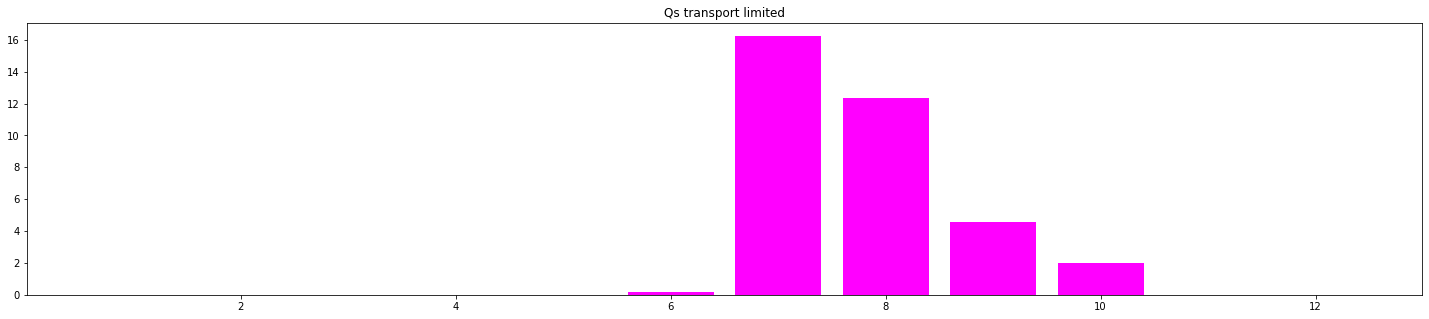

In [53]:
plt.figure(figsize=(25,5))

# transport limited
plt.bar(height = mean_monthly_sum.Qstl, x = mean_monthly_sum.index, color = 'magenta', label = 'Qs transport limited')
plt.bar(height = mean_monthly_sum.Qstl, x = mean_monthly_sum.index, color = 'magenta', label = 'Qs transport limited')
